## Методы text-similarity ##

https://www.quora.com/What-are-the-most-popular-text-similarity-algorithms

1. doc2vec + cosine measure https://code.google.com/archive/p/word2vec/ 
<br>
    GloVe + cosine https://nlp.stanford.edu/projects/glove/
   <br>
   https://github.com/v1shwa/document-similarity
2. Jaccard similarity 
<br>
    https://en.wikipedia.org/wiki/Jaccard_index
<br>
    https://nickgrattan.wordpress.com/2014/02/18/jaccard-similarity-index-for-measuring-document-similarity/
3. Locality-sensitive hashing  
    https://en.wikipedia.org/wiki/Locality-sensitive_hashing 
<br>
    https://github.com/kayzhu/LSHash
<br>
    http://www.mmds.org/
4. Cosine Similarity and IDF Modified Cosine Similarity https://www.youtube.com/watch?v=C3Jt14Se9Cg&feature=youtu.be
<br>
<br>
* cosine similarity in gensim: https://radimrehurek.com/gensim/similarities/docsim.html
<br>
<br>
https://stackoverflow.com/questions/35758612/most-efficient-way-to-construct-similarity-matrix
<br>
<br>
https://ematosevic.wordpress.com/2016/08/21/clustering-data-with-similarity-matrix-in-python-tutorial/

### Articles data

In [1]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

In [2]:
import pandas as pd
import re
#from nltk.corpus import stopwords
#stopwords_rus = stopwords.words('russian')
import sklearn
#from sklearn.pipeline import Pipeline

from stop_words import get_stop_words
stopwords = get_stop_words('russian')

import numpy as np

In [3]:
from tqdm import tqdm

In [4]:
metadata = pd.read_csv('meta_rubrics_final.tsv', encoding = 'utf-8', sep = '\t')

In [6]:
def slurp(path):
    with open(path, 'r', encoding = 'utf-8') as file_object:
        return file_object.read()

In [7]:
metadata[metadata.path == 'geektimes.ru/post_267982.txt']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics
4634,geektimes.ru/post_267982.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/post/267982,20 декабря 2015,"Американские учёные утверждают, что до 90% рис...",NaN,Вячеслав Голованов,Научно-популярное_Здоровье гика,Статьи,Мусор|Физиология человека,Физиология человека,One


In [288]:
texts = []
files_not_found = []
for path in tqdm(metadata.path):
    #path = path.replace('\n','').replace('//','/').replace('?code=','-code=').replace('?utm','-utm').replace('/pages_indicator', 'Indicator.ru/indicator_clear_text')
    #if ('Indicator.ru' in path) or ('nplus1.ru' in path):
    #    path += '.txt'
    try:
        texts.append(slurp('C:/Users/Анна/YandexDisk/popular_science_texts_store/' + path))
    except FileNotFoundError:
        files_not_found.append('C:/Users/Анна/YandexDisk/popular_science_texts_store/' + path)
        texts.append('')
        #C:\Users\Анна\YandexDisk\popular_science_texts_store\Indicator.ru\indicator_clear_text

100%|██████████████████████████████████| 30793/30793 [00:08<00:00, 3638.38it/s]


In [292]:
with open('files_not_found.txt', 'w', encoding='utf-8') as f:
    for file in files_not_found:
        f.write(file + '\n')

In [6]:
"""texts = []
for path in tqdm(metadata.path):
    path = path.replace('\n','').replace('//','/').replace('?code=','-code=')
    try:
        with open('C:/Users/Анна/YandexDisk/popular_science_texts_store/' + path, encoding = 'utf-8') as f:
            texts.append(f.read())
    except OSError:
        texts.append('')"""

100%|██████████████████████████████████| 30793/30793 [00:19<00:00, 1539.69it/s]


In [252]:
metadata[metadata.path == 'geektimes.ru/post_267982.txt']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
4634,geektimes.ru/post_267982.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/post/267982,20 декабря 2015,"Американские учёные утверждают, что до 90% рис...",NaN,Вячеслав Голованов,Научно-популярное_Здоровье гика,Статьи,Мусор|Физиология человека,Физиология человека,One,


In [293]:
metadata['text'] = texts

In [143]:
metadata.shape

(30793, 13)

In [144]:
#articles_df = metadata[metadata.text != '']
#metadata[metadata.path == 'postnauka.ru\1\65816.txt']
metadata[metadata.url == 'nplus1.ru/material/2015/07/13/tediously-accurate']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
20412,nplus1.ru/nplus1_materials/nplus1.ru-material-...,nplus1.ru,nplus1.ru/material/2015/07/13/tediously-accurate,2015-07-13,Утомительно точная карта Солнечной системы,NaN,Николай Воронцов,_Блоги_Космос_Астрономические дневники_,Статьи,Космос|Космос|Мусор,Космос,One,"Насколько велик космос? Конечно, некоторые из ..."


### Fix paths for n+1

In [80]:
file_paths = []
for index, row in tqdm(metadata.iterrows()):
    if row['source'] == 'nplus1.ru':
        if 'nplus1.ru/news/' in row['url']:
            path = 'nplus1.ru/nplus1_news/'
        elif 'nplus1.ru/blog/' in row['url']:
            path = 'nplus1.ru/nplus1_blog/'
        elif 'nplus1.ru/material/' in row['url']:
            path = 'nplus1.ru/nplus1_materials/'
        path += re.sub('/','-', row['url'])
    else:
        path = row['path']
    file_paths.append(path)

30793it [00:06, 4483.05it/s]


In [284]:
metadata.iloc[30000:30010]

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
30000,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/14/ps_rosetta/,14 ноября 2014,Новости с кометы и споры на Земле,NaN,Максим Руссо,_астрономия_кометы_космос,Статьи,Космос|Космос|Космос,Космос,One,\n \n \n \n \n13 ноября в Библиотеке-ч...
30001,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/14/ps_yarov/,14 ноября 2014,Блокада глазами ленинградцев,NaN,Максим Руссо,_великая отечественная война_история россии_пу...,Статьи,История|История|Мусор,История,One,\n \n \n \n \nУ физических антрополого...
30002,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/15/ps_pamyati_zubova/,15 ноября 2014,«Он был хорошим собеседником по любой научной ...,NaN,Наталия Халдеева,_история науки_памяти посвящается_физическая а...,Статьи,История|Мусор|Физиология человека,Физиология человека,Multi,\n \n \n \n \nЕсли еще пару лет назад ...
30003,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/18/ps_robots/,18 ноября 2014,Робототехника на грани фантастики,NaN,Александра Молодчик,_робототехника,Статьи,Технологии,Технологии,One,\n \n \n \n \nОбезьяны начинают исполь...
30004,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/18/ps_tools/,18 ноября 2014,Условия прогресса: обезьяны и орудия,NaN,Александра Брутер,_биология _обезьяны_этология,Статьи,Биология|Биология|Биология,Биология,One,\n \n \n \n \nУ каждой крупной IT-комп...
30005,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/22/ps_10/,22 ноября 2014,Десять лет спустя: как все поменялось в IT-мире,NaN,Александра Молодчик,NaN,Статьи,NaN,Мусор,One,\n \n \n \n \nПутешествуя по Бельгии ...
30006,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/23/ps_bontoc/,23 ноября 2014,Живые экспонаты,NaN,Максим Руссо,_история_этнография,Статьи,История|Культура,Культура,Multi,\n \n \n \n \nРанее мы сообщали о заве...
30007,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/29/ps_cairo/,29 ноября 2014,Коптский храм аль-Муаллака в зеркале египетско...,NaN,Елена Толмачева,_египет_история_копты_христианство,Статьи,История|История|Культура|Мусор,История,One,\n \n \n \n \nЧасть 1 \n \n Н...
30008,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/12/06/ps_cairo2/,06 декабря 2014,Коптский храм аль-Муаллака в зеркале египетско...,NaN,Елена Толмачева,_египет_история_копты,Статьи,История|История|Мусор,История,One,\n \n \n \n \nВообще-то в мои планы не...
30009,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/12/07/ps_richard/,07 декабря 2014,Ричард III и анализ ДНК,NaN,Александра Брутер,_великобритания_генетика_история_монархия,Статьи,История|История|Мусор|Физиология человека,История,One,\n \n \n \n \nВ Университете Фрайбурга...


In [275]:
metadata.iloc[22382]

path                                          postnauka.ru\2\63062.txt
source                                            https://postnauka.ru
url                                                       /video/63062
date                                                     15 April 2016
title                                      Поиски инопланетных геномов
subtitle             Биолог Кристофер Карр о поздней тяжелой бомбар...
author                                                  Кристофер Карр
tags                                                        астрономия
genre                                                            видео
mapped_rubrics                                                  Космос
final_rubrics                                                   Космос
number_of_rubrics                                                  One
text                                                                  
Name: 22382, dtype: object

In [274]:
for i, path in enumerate(metadata.path.values):
    if '63062' in path:
        print(path)
        print(i)
#metadata['63062.txt' in metadata.path]

geektimes.ru/post_263062.txt
4306
postnauka.ru\2\63062.txt
22382


In [290]:
print(metadata.iloc[30000:30010].path.values)

[ 'polit.ru_proscience/proscience_articles/article-2014-11-14-ps_rosetta-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-11-14-ps_yarov-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-11-15-ps_pamyati_zubova-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-11-18-ps_robots-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-11-18-ps_tools-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-11-22-ps_10-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-11-23-ps_bontoc-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-11-29-ps_cairo-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-12-06-ps_cairo2-index.txt'
 'polit.ru_proscience/proscience_articles/article-2014-12-07-ps_richard-index.txt']


In [291]:
print(metadata.iloc[30000:30010].url.values)

['polit.ru/article/2014/11/14/ps_rosetta/'
 'polit.ru/article/2014/11/14/ps_yarov/'
 'polit.ru/article/2014/11/15/ps_pamyati_zubova/'
 'polit.ru/article/2014/11/18/ps_robots/'
 'polit.ru/article/2014/11/18/ps_tools/'
 'polit.ru/article/2014/11/22/ps_10/'
 'polit.ru/article/2014/11/23/ps_bontoc/'
 'polit.ru/article/2014/11/29/ps_cairo/'
 'polit.ru/article/2014/12/06/ps_cairo2/'
 'polit.ru/article/2014/12/07/ps_richard/']


In [294]:
metadata.iloc[[29516]]

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
29516,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2013/03/15/ps_3Dprint/,15 марта 2013,Трехмерная печать покоряет космос,NaN,NaN,_естественные и точные науки_технологии,Статьи,Мусор|Технологии,Технологии,One,


In [295]:
metadata.iloc[30000:30010]

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
30000,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/14/ps_rosetta/,14 ноября 2014,Новости с кометы и споры на Земле,NaN,Максим Руссо,_астрономия_кометы_космос,Статьи,Космос|Космос|Космос,Космос,One,\n \n \n \n \nПосле тогда как 12 нояб...
30001,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/14/ps_yarov/,14 ноября 2014,Блокада глазами ленинградцев,NaN,Максим Руссо,_великая отечественная война_история россии_пу...,Статьи,История|История|Мусор,История,One,\n \n \n \n \n13 ноября в Библиотеке-ч...
30002,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/15/ps_pamyati_zubova/,15 ноября 2014,«Он был хорошим собеседником по любой научной ...,NaN,Наталия Халдеева,_история науки_памяти посвящается_физическая а...,Статьи,История|Мусор|Физиология человека,Физиология человека,Multi,\n \n \n \n \nУ физических антрополого...
30003,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/18/ps_robots/,18 ноября 2014,Робототехника на грани фантастики,NaN,Александра Молодчик,_робототехника,Статьи,Технологии,Технологии,One,\n \n \n \n \nЕсли еще пару лет назад ...
30004,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/18/ps_tools/,18 ноября 2014,Условия прогресса: обезьяны и орудия,NaN,Александра Брутер,_биология _обезьяны_этология,Статьи,Биология|Биология|Биология,Биология,One,\n \n \n \n \nОбезьяны начинают исполь...
30005,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/22/ps_10/,22 ноября 2014,Десять лет спустя: как все поменялось в IT-мире,NaN,Александра Молодчик,NaN,Статьи,NaN,Мусор,One,\n \n \n \n \nУ каждой крупной IT-комп...
30006,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/23/ps_bontoc/,23 ноября 2014,Живые экспонаты,NaN,Максим Руссо,_история_этнография,Статьи,История|Культура,Культура,Multi,\n \n \n \n \nПутешествуя по Бельгии ...
30007,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/11/29/ps_cairo/,29 ноября 2014,Коптский храм аль-Муаллака в зеркале египетско...,NaN,Елена Толмачева,_египет_история_копты_христианство,Статьи,История|История|Культура|Мусор,История,One,\n \n \n \n \nРанее мы сообщали о заве...
30008,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/12/06/ps_cairo2/,06 декабря 2014,Коптский храм аль-Муаллака в зеркале египетско...,NaN,Елена Толмачева,_египет_история_копты,Статьи,История|История|Мусор,История,One,\n \n \n \n \nЧасть 1 \n \n Н...
30009,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/12/07/ps_richard/,07 декабря 2014,Ричард III и анализ ДНК,NaN,Александра Брутер,_великобритания_генетика_история_монархия,Статьи,История|История|Мусор|Физиология человека,История,One,\n \n \n \n \nВообще-то в мои планы не...


In [281]:
print(metadata.iloc[30780:30792].path.values)


[ 'polit.ru_proscience/proscience_articles/article-2017-11-08-ps_dark_matter_rnf-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-08-ps_mipt-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-09-ps_eb-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-10-ps_mipt-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-11-ps_11-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-12-ps_pylos_combat_agate-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-13-ps_fibrodysplasia-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-13-ps_rnf_tolstykh-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-14-ps_nudge-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-15-ps_mummy-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-15-ps_nudge2-index.txt'
 'polit.ru_proscience/proscience_articles/article-2017-11-15-ps_ross128b-ind

In [282]:
print(metadata.iloc[30780:30792].url.values)

['polit.ru/article/2017/11/08/ps_dark_matter_rnf/'
 'polit.ru/article/2017/11/08/ps_mipt/'
 'polit.ru/article/2017/11/09/ps_eb/'
 'polit.ru/article/2017/11/10/ps_mipt/'
 'polit.ru/article/2017/11/11/ps_11/'
 'polit.ru/article/2017/11/12/ps_pylos_combat_agate/'
 'polit.ru/article/2017/11/13/ps_fibrodysplasia/'
 'polit.ru/article/2017/11/13/ps_rnf_tolstykh/'
 'polit.ru/article/2017/11/14/ps_nudge/'
 'polit.ru/article/2017/11/15/ps_mummy/'
 'polit.ru/article/2017/11/15/ps_nudge2/'
 'polit.ru/article/2017/11/15/ps_ross128b/']


In [89]:
file_paths[19750:19760]

['nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-08-superconductivity',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-13-weather',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-13-youngest-phd',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-14-ms',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-14-titanic',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-just-read-the-instructions',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-leonardo',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-nasa-vehicle',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-solution',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-space']

In [213]:
metadata[metadata.source == 'http://polit.ru/rubric/proscience/']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
25533,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/09/12/ps_bacteriofag/,12 сентября 2012,"Бактериофаги можно купить только в Грузии, Рос...",NaN,NaN,_бактериофаги_биология _естественные и точные ...,Новости,Биология|Биология|Мусор|Физиология человека,Биология,One,\n \n \n \n \nИзбыток навоза не компен...
25534,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/09/12/ps_brain_education/,12 сентября 2012,Исследования мозга заставляют пересмотреть под...,NaN,NaN,_естественные и точные науки_мозг_нейробиология,Новости,Биология|Мусор|Физиология человека,Биология,Multi,\n \n \n \n \nВозможность исследовать ...
25535,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/09/13/ps_parasite_tounge/,13 сентября 2012,Мокрицы-паразиты умеют превращаться в рыбьи языки,NaN,NaN,_биология _естественные и точные науки_паразиты,Новости,Биология|Биология|Мусор,Биология,One,\n \n \n \n \n \n \n Cymo h...
25536,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/09/13/ps_point_of_law/,13 сентября 2012,Точки повышения рельефа подчиняются законам ма...,NaN,NaN,_геология_естественные и точные науки,Новости,Мусор|Науки о земле,Науки о земле,One,\n \n \n \n \nТочки повышения рельефа ...
25537,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/09/14/ps_triple_death/,14 сентября 2012,"Найден скелет рыбы, которая убила птеродактиля...",NaN,NaN,_естественные и точные науки_палеонтология,Новости,Мусор|Науки о земле,Науки о земле,One,\n \n \n \n \nСцена с тремя нелепыми с...
25538,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/09/15/ps_scand_kills/,15 сентября 2012,Средневековые скандинавы налаживали отношения ...,NaN,NaN,_гуманитарные и социальные науки_саги_федор у...,Новости,Культура|Мусор|Мусор,Культура,One,\n \n \n \n \nИз саг мы узнаем о том ...
25539,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/10/01/ps_scars_vs_cry/,01 октября 2012,Восточно-африканские племена шрамируют капризн...,NaN,NaN,_восточная африка_гуманитарные и социальные н...,Новости,Мусор|Мусор,Мусор,One,\n \n \n \n \nВ традиционных культурах...
25540,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/10/02/ps_india_free_voice_...,02 октября 2012,Индийские власти отменяют плату за голосовую с...,NaN,NaN,_индия_интернет_сотовая связь,Новости,Computer Science|Мусор|Технологии,Технологии,Multi,\n \n \n \n \nМинистр телекоммуникаций...
25541,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/10/05/ps_bold_n_hairy/,05 октября 2012,Эксперименты на мышах проясняют механизмы облы...,NaN,NaN,_биология _естественные и точные науки,Новости,Биология|Мусор,Биология,One,\n \n \n \n \nЛюдям угодить сложно - г...
25542,polit.ru_proscience/proscience_news/news-2012-...,http://polit.ru/rubric/proscience/,polit.ru//news/2012/10/05/ps_newcellsfromlymph/,05 октября 2012,Ученым удалось вырастить новые клетки в лимфоу...,NaN,NaN,_биология _естественные и точные науки_стволов...,Новости,Биология|Биология|Мусор,Биология,One,\n \n \n \n \nУченые из университета П...


In [218]:
print(metadata.iloc[[25549]].path.values)
print(metadata.iloc[[25549]].url.values)

[ 'polit.ru_proscience/proscience_news/news-2012-10-18-ps_standeducation-index.txt']
['polit.ru//news/2012/10/18/ps_standeducation/']


In [226]:
samp = metadata.iloc[29510:29520]

In [231]:
file_paths = []
for index, row in tqdm(metadata.iterrows()):
    if row['source'] == 'http://polit.ru/rubric/proscience/':
        if 'polit.ru//news/' in row['url']:
            path = 'polit.ru_proscience/proscience_news/'
            url_path = re.sub('polit.ru//','', row['url'])
        elif 'polit.ru/article/' in row['url']:
            path = 'polit.ru_proscience/proscience_articles/'
            url_path = re.sub('polit.ru/','', row['url'])
        #elif 'nplus1.ru/material/' in row['url']:
        #    path = 'nplus1.ru/nplus1_materials/'
        #url_path = re.sub('polit.ru/','', row['url'])
        path += re.sub('/','-', url_path)
        path += 'index.txt'
    else:
        path = row['path']
    file_paths.append(path)

30793it [00:06, 4844.88it/s]


In [242]:
print(metadata.iloc[29510:29520].path.values)

[ 'polit.ru_proscience/proscience_articles/article-2013-03-11-ps_childlanguage-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-11-ps_geoinform3-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-12-ps_bonch-osm_sc20_1-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-13-ps_neanderthals-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-14-ps_dnafortuneteller-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-14-ps_life_on_mars_comment_pimenov-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-15-ps_civilbang-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-15-ps_tasmdevil_cancerfree-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-17-ps_diklofenak_attacks_india-index.txt'
 'polit.ru_proscience/proscience_articles/article-2013-03-18-ps_smartbees-index.txt']


In [244]:
file_paths[29510:29520]

['polit.ru_proscience/proscience_articles/article-2013-03-11-ps_childlanguage-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-11-ps_geoinform3-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-12-ps_bonch-osm_sc20_1-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-13-ps_neanderthals-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-14-ps_dnafortuneteller-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-14-ps_life_on_mars_comment_pimenov-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-15-ps_3Dprint-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-15-ps_civilbang-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-15-ps_tasmdevil_cancerfree-index.txt',
 'polit.ru_proscience/proscience_articles/article-2013-03-17-ps_diklofenak_attacks_india-index.txt']

In [245]:
metadata['path'] = file_paths

In [246]:
len(file_paths)

30793

In [93]:
paths = []
titles = []
paths.append(metadata[metadata.url == 'nplus1.ru/news/2015/04/15/nasa-vehicle'].path.values)
titles.append(metadata[metadata.url == 'nplus1.ru/news/2015/04/15/nasa-vehicle'].title.values)

In [94]:
paths.append(metadata[metadata.url == 'nplus1.ru/blog/2015/04/15/just-read-the-instructions'].path.values)
titles.append(metadata[metadata.url == 'nplus1.ru/blog/2015/04/15/just-read-the-instructions'].title.values)

In [98]:
paths

[array([ 'nplus1.ru/nplus1_materials/nplus1.ru-material-2015-07-13-tediously-accurate'], dtype=object),
 array(['nplus1.ru/nplus1_news/nplus1.ru-news-2015-07-10-tu160-back'], dtype=object)]

In [96]:
titles

[array(['Автомобиль нового поколения по версии NASA'], dtype=object),
 array(['Посадка Falcon 9 на платформу'], dtype=object)]

In [97]:
paths = []
titles = []
paths.append(metadata[metadata.url == 'nplus1.ru/material/2015/07/13/tediously-accurate'].path.values)
titles.append(metadata[metadata.url == 'nplus1.ru/material/2015/07/13/tediously-accurate'].title.values)

paths.append(metadata[metadata.url == 'nplus1.ru/news/2015/07/10/tu160-back'].path.values)
titles.append(metadata[metadata.url == 'nplus1.ru/news/2015/07/10/tu160-back'].title.values)

In [46]:
meta_update = pd.read_csv('joint_metadata.tsv', encoding = 'utf-8', sep = '\t', index_col=0)

In [56]:
meta_update.head(2)

,author,date,genre,path,source,subtitle,tags,title,url
0,Егор Задереев,2017-08-16,Статьи,chrdk.ru/articles/sci_10_salt_lakes.txt,https://chrdk.ru/,NaN,География_Экология,Десять самых известных соленых озер,https://chrdk.ru/sci/10_salt_lakes
1,Екатерина Боровикова,2017-08-08,Статьи,chrdk.ru/articles/sci_33_fractures.txt,https://chrdk.ru/,Скелет мужчины с 33 переломами нашли археологи...,Российская наука_Антропология,33 перелома,https://chrdk.ru/sci/33_fractures


In [48]:
paths = []
titles = []
paths.append(meta_update[meta_update.url == 'nplus1.ru/material/2015/07/13/tediously-accurate'].path.values)
titles.append(meta_update[meta_update.url == 'nplus1.ru/material/2015/07/13/tediously-accurate'].title.values)

paths.append(meta_update[meta_update.url == 'nplus1.ru/news/2015/07/10/tu160-back'].path.values)
titles.append(meta_update[meta_update.url == 'nplus1.ru/news/2015/07/10/tu160-back'].title.values)

In [49]:
paths

[array(['nplus1.ru/nplus1_materials/nplus1.ru-material-2015-07-13-use.txt\n'], dtype=object),
 array(['nplus1.ru/nplus1_news/nplus1.ru-news-2015-07-13-use.txt\n'], dtype=object)]

In [299]:
metadata[metadata.text == '']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
4634,geektimes.ru/post_267982.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/post/267982,20 декабря 2015,"Американские учёные утверждают, что до 90% рис...",NaN,Вячеслав Голованов,Научно-популярное_Здоровье гика,Статьи,Мусор|Физиология человека,Физиология человека,One,
6930,geektimes.ru/post_74486.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/post/74486,6 ноября 2009,Создатели вакцины от Свиного гриппа не хотят в...,NaN,ostrov,Научно-популярное,Статьи,Мусор,Мусор,One,
6934,geektimes.ru/post_74986.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/post/74986,11 ноября 2009,Столкновение пуль при одном миллионе кадров в ...,NaN,Димочка,Научно-популярное,Статьи,Мусор,Мусор,One,
19811,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-06-1...,nplus1.ru,nplus1.ru/blog/2015/06/17/first,2015-06-17,Первый крестовый поход,NaN,Алена Пашко,_Блоги_Лимб_,Блоги,Культура|Мусор,Культура,One,
19865,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-08-1...,nplus1.ru,nplus1.ru/blog/2015/08/18/russo-japan-war,2015-08-18,Японо-русская война,NaN,Алена Пашко,_Блоги_Лимб_,Блоги,Культура|Мусор,Культура,One,
19875,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-09-0...,nplus1.ru,nplus1.ru/blog/2015/09/08/sc-html5,2015-09-08,Battlecruiser operational,NaN,Николай Воронцов,_Технологии_Мезонин_,Блоги,|Технологии,Технологии,One,
19887,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-10-1...,nplus1.ru,nplus1.ru/blog/2015/10/19/phyzjokes,2015-10-19,Отличная осенняя шутка,NaN,Михаил Ерохин,_Блоги_Физтехи шутят_,Блоги,Мусор|Мусор,Мусор,One,
19894,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-10-1...,nplus1.ru,nplus1.ru/blog/2015/10/12/reformation,2015-10-12,Реформация и оправдание кредита,NaN,Алена Пашко,_Блоги_Наука_Лимб_,Блоги,Культура|Мусор|Мусор,Культура,One,
19898,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-10-1...,nplus1.ru,nplus1.ru/blog/2015/10/15/grafik,2015-10-15,Четверг: шутка про график,NaN,Михаил Ерохин,_Блоги_Физтехи шутят_,Блоги,Мусор|Мусор,Мусор,One,
19899,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-10-1...,nplus1.ru,nplus1.ru/blog/2015/10/16/phyzjokes,2015-10-16,"Все, что нужно знать экспериментаторам",NaN,Михаил Ерохин,_Блоги_Физтехи шутят_,Блоги,Мусор|Мусор,Мусор,One,


In [300]:
articles_df = metadata[metadata.text != '']
articles_df.shape

(30628, 13)

In [301]:
articles_df[articles_df.url == 'nplus1.ru/news/2015/04/15/nasa-vehicle']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
8699,nplus1.ru/nplus1_news/nplus1.ru-news-2015-04-1...,nplus1.ru,nplus1.ru/news/2015/04/15/nasa-vehicle,2015-04-15,Автомобиль нового поколения по версии NASA,NaN,Николай Воронцов,_Блоги_Мезонин_,Новости,|Мусор,Мусор,One,NASA продемонстрировало роботизированный автом...


In [302]:
articles_df[articles_df.url == 'nplus1.ru/blog/2015/04/15/just-read-the-instructions']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
19755,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-1...,nplus1.ru,nplus1.ru/blog/2015/04/15/just-read-the-instru...,2015-04-15,Посадка Falcon 9 на платформу,NaN,Николай Воронцов,_Космос_Мезонин_,Блоги,|Космос,Космос,One,Сегодня ночью была третья попытка посадить рак...


### Fix paths in metatable

In [130]:
file_paths_correct = []
for index, row in tqdm(metadata.iterrows()):
    path = row['path']
    path = path.replace('\n','').replace('//','/').replace('?code=','-code=').replace('?utm','-utm').replace('/pages_indicator', 'Indicator.ru/indicator_clear_text')
    if ('Indicator.ru' in path) or ('nplus1.ru' in path):
        path += '.txt'
    
    file_paths_correct.append(path)

30793it [00:06, 5081.93it/s]


In [136]:
print(metadata.iloc[19750:19760].path.values)

['nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-08-superconductivity'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-13-weather'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-13-youngest-phd'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-14-ms'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-14-titanic'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-just-read-the-instructions'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-leonardo'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-nasa-vehicle'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-solution'
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-space']


In [137]:
file_paths_correct[19750:19760]

['nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-08-superconductivity.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-13-weather.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-13-youngest-phd.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-14-ms.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-14-titanic.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-just-read-the-instructions.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-leonardo.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-nasa-vehicle.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-solution.txt',
 'nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-15-space.txt']

In [138]:
old_paths = metadata.path.values

In [140]:
metadata['path'] = file_paths_correct

In [148]:
metadata.sample(n = 10)

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
603,chrdk.ru/news/news_cherdak_organizuet_lektsiu_...,https://chrdk.ru/,https://chrdk.ru/news/cherdak_organizuet_lekts...,14.09.2016,«Чердак» проведет лекцию по этнологии народов ...,NaN,NaN,Этнология_Анонс,Новости,Культура|Мусор,Культура,One,"22 сентября в 19.00 портал ""Чердак"" и НТО имен..."
1155,chrdk.ru/news/news_navoznye_zhuki_tantsuut_na_...,https://chrdk.ru/,https://chrdk.ru/news/navoznye_zhuki_tantsuut_...,16.05.2016,Навозные жуки танцуют на шаре и фотографируют ...,NaN,NaN,Астрономия_Науки о живом_Биология_Репортаж_Видео,Новости,Биология|Биология|Космос|Мусор|Мусор,Биология,One,"Навозные жуки делают «снимки» неба, чтобы орие..."
23817,postnauka.ru\5\3628.txt,https://postnauka.ru,/video/3628,20 September 2012,Социальная топология,Социолог Виктор Вахштайн об экспорте топологии...,Виктор Вахштайн,социология,видео,Социология,Социология,One,Как Джон Ло предложил использовать методы топо...
15198,nplus1.ru/nplus1_news/nplus1.ru-news-2016-09-1...,nplus1.ru,nplus1.ru/news/2016/09/15/helicopter,2016-09-15,Украинцы испытали высокоскоростной легкий верт...,NaN,Василий Сычев,_Транспорт_Технологии_,Новости,Технологии|Технологии,Технологии,One,VV-2 SOFTEXVIDEO / YouTube Украинская компания...
22829,postnauka.ru\3\45458.txt,https://postnauka.ru,/video/45458,12 April 2015,Периодизация истории Древнего Китая,Историк Марк Ульянов о переосмыслении периодиз...,Марк Ульянов,история,видео,История,История,One,"Рассказать, на какие периоды делится история ..."
24023,postnauka.ru\6\72338.txt,https://postnauka.ru,/faq/72338,31 January 2017,Теория игр,"Политолог Стивен Брамс о дилемме заключенного,...",Стивен Брамс,математика,FAQ,Математика,Математика,One,Теория игр — это математическая теория стратег...
28339,polit.ru_proscience/proscience_news/news-2016-...,http://polit.ru/rubric/proscience/,polit.ru//news/2016/08/08/ps_migratory_birds/,08 августа 2016,Орнитологи расставили сети в Вашингтоне,NaN,NaN,_биология _биоразнообразие_охрана окружающей с...,Новости,Биология|Биология|Биология|Науки о земле,Биология,One,\n \n \n \n \nВ центре Вашингтона на ...
175,chrdk.ru/articles/sci_na_marse_nashli_anomalnu...,https://chrdk.ru/,https://chrdk.ru/sci/na_marse_nashli_anomalnuj...,28.07.2015,Марсианский «Лось»,Марсоход Curiosity обнаружил на красной планет...,NaN,Робототехника_Космос_Российская наука,Статьи,Космос|Мусор|Технологии,Космос,Multi,Марсоход Curiosity (от английского «любопытств...
17689,nplus1.ru/nplus1_news/nplus1.ru-news-2017-05-1...,nplus1.ru,nplus1.ru/news/2017/05/16/Henderson-pollution,2017-05-16,Пластик добрался до отдаленных необитаемых ост...,NaN,Екатерина Русакова,_Наука_,Новости,Мусор,Мусор,One,А. Пластиковые отходы на Восточном пляже остро...
13860,nplus1.ru/nplus1_news/nplus1.ru-news-2016-05-1...,nplus1.ru,nplus1.ru/news/2016/05/11/unsafe,2016-05-11,Секс и алкоголь увенчали список рисков для здо...,NaN,Олег Лищук,_Наука_,Новости,Мусор,Мусор,One,"Кадр из фильма «Детки» Kids, Miramax, 1995 Меж..."


In [151]:
articles_df = metadata[metadata.text != '']

In [303]:
articles_df.shape

(30628, 13)

In [153]:
articles_df.sample(n=10)

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
2618,geektimes.ru/company_ua-hosting_blog_276042.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/company/ua-hosting/blog/2...,27 мая 2016,Великий ученый и просветитель — Николай Иосафо...,NaN,Elena,Научно-популярное_История IT_IT-Биографии_Блог...,Блоги,Computer Science|Мусор|Мусор|Мусор,Computer Science,One,Известный московский профессор и видный специа...
4920,geektimes.ru/post_272292.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/post/272292,9 марта 2016,История борьбы за время в космосе,NaN,Филипп Терехов,Научно-популярное_Космонавтика,Статьи,Космос|Мусор,Космос,One,\nНа прошлой неделе успешно завершилась годова...
9073,nplus1.ru/nplus1_news/nplus1.ru-news-2015-05-2...,nplus1.ru,nplus1.ru/news/2015/05/26/neutrons-in-the-dete...,2015-05-26,Алмазы помогут увидеть «термоядерные» нейтроны,NaN,Владимир Королев,_Наука_Технологии_,Новости,Мусор|Технологии,Технологии,One,"Внешний вид нейтронного детектора, разработанн..."
26290,polit.ru_proscience/proscience_news/news-2013-...,http://polit.ru/rubric/proscience/,polit.ru//news/2013/12/04/ps_water/,04 декабря 2013,На пяти экзопланетах найдена вода,NaN,NaN,_космос_открытия,Новости,Космос|Мусор,Космос,One,\n \n \n \n \n Интеллектуаль...
16634,nplus1.ru/nplus1_news/nplus1.ru-news-2017-02-1...,nplus1.ru,nplus1.ru/news/2017/02/10/lm100j,2017-02-10,Состоялась выкатка гражданской версии Super He...,NaN,Василий Сычев,_Транспорт_,Новости,Технологии,Технологии,One,LM-100J Lockheed Martin Американская компания ...
30074,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2015/02/18/ps_microbe/,18 февраля 2015,Новые носители наследственной информации,NaN,Александра Брутер,_бактерии_биология _генетика,Статьи,Биология|Биология|Физиология человека,Биология,One,\n \n \n \n \nГруппа ученых из США про...
22823,postnauka.ru\3\41673.txt,https://postnauka.ru,/video/41673,17 February 2015,Иммунная активация и болезни человека,Биолог Леонид Марголис об общей теории медицин...,Леонид Марголис,биология,видео,Биология,Биология,One,Вся современная естественная наука вышла из и...
3647,geektimes.ru/post_249258.txt,https://geektimes.ru/hub/popular_science/,https://geektimes.ru/post/249258,20 апреля 2015,Компьютерная эмуляция мозга пчелы управляет др...,NaN,Максим Агаджанов,Научно-популярное_Мультикоптеры_Искусственный ...,Статьи,Computer Science|Мусор|Мусор|Технологии,Технологии,Multi,"\n\nВ то время, как некоторые специалисты прод..."
17411,nplus1.ru/nplus1_news/nplus1.ru-news-2017-04-2...,nplus1.ru,nplus1.ru/news/2017/04/28/i-do-it-all,2017-04-28,Строительный 3D-принтер превратили в автономно...,NaN,Николай Воронцов,_Технологии_Роботы и дроны_,Новости,Технологии|Технологии,Технологии,One,"Steven J. Keating et al., / Science Robotics В..."
10596,nplus1.ru/nplus1_news/nplus1.ru-news-2015-09-1...,nplus1.ru,nplus1.ru/news/2015/09/11/vr-mermaid,2015-09-11,Художник Disney нарисовал Русалочку в виртуаль...,NaN,Николай Воронцов,_Технологии_Мезонин_,Новости,|Технологии,Технологии,One,Глен Кин работает в VR-очках HTC Vive. Кадр: F...


In [304]:
articles_df.to_csv('articles_with_meta.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [359]:
articles_df[articles_df.text == '']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text


In [305]:
meta = articles_df.drop(['text'], axis = 1)

In [307]:
print(meta[meta.url == 'polit.ru/article/2017/11/08/ps_dark_matter_rnf/'].path.values)

[ 'polit.ru_proscience/proscience_articles/article-2017-11-08-ps_dark_matter_rnf-index.txt']


In [308]:
meta.head()

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics
0,chrdk.ru/articles/sci_10_salt_lakes.txt,https://chrdk.ru/,https://chrdk.ru/sci/10_salt_lakes,16.08.2017,Десять самых известных соленых озер,NaN,Егор Задереев,География_Экология,Статьи,Науки о земле|Науки о земле,Науки о земле,One
1,chrdk.ru/articles/sci_33_fractures.txt,https://chrdk.ru/,https://chrdk.ru/sci/33_fractures,08.08.2017,33 перелома,Скелет мужчины с 33 переломами нашли археологи...,Екатерина Боровикова,Российская наука_Антропология,Статьи,История|Мусор,История,One
2,chrdk.ru/articles/sci_46_chromosomes.txt,https://chrdk.ru/,https://chrdk.ru/sci/46_chromosomes,04.08.2017,46 — норма?,Считаем хромосомы: сколько человеку для счасть...,Полина Лосева,Генетика_Медицина,Статьи,Физиология человека|Физиология человека,Физиология человека,One
3,chrdk.ru/articles/sci_750gev.txt,https://chrdk.ru/,https://chrdk.ru/sci/750gev,23.08.2016,Несбывшиеся надежды на новую физику,Какие «страшные сценарии» физики хотели забыть...,Екатерина Боровикова,Физика_Интервью_Закрытия,Статьи,Мусор|Мусор|Физика,Физика,One
4,chrdk.ru/articles/sci_alien_anatomy.txt,https://chrdk.ru/,https://chrdk.ru/sci/alien_anatomy,22.05.2017,Анатомия каменных пришельцев,Спецпроект «Чердака» и «Красивой науки»,NaN,Геология_Космос,Статьи,Космос|Науки о земле,Космос,Multi


In [309]:
meta.to_csv('meta_rubrics_final.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [155]:
articles_df[articles_df.url == 'nplus1.ru/blog/2015/04/15/just-read-the-instructions']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
19755,nplus1.ru/nplus1_blog/nplus1.ru-blog-2015-04-1...,nplus1.ru,nplus1.ru/blog/2015/04/15/just-read-the-instru...,2015-04-15,Посадка Falcon 9 на платформу,NaN,Николай Воронцов,_Космос_Мезонин_,Блоги,|Космос,Космос,One,Сегодня ночью была третья попытка посадить рак...


### Preproccessing

In [5]:
articles_df = pd.read_csv('articles_with_meta.tsv', sep = '\t', encoding = 'utf-8')

In [5]:
#without lemmatization and stop-words
def simple_clean(texts):
    preprocessed_texts_list = []
    for text in tqdm(texts):
        #del_new_line = re.sub(r'\n', '', text.lower()) 
        extracted_text = re.findall(r'[a-zа-яё]+', text.lower())#разделяем на токены
        extracted_text = ' '.join(extracted_text)
        preprocessed_texts_list.append(extracted_text)
    return preprocessed_texts_list

In [5]:
articles_df[articles_df.url == 'polit.ru/article/2014/12/07/ps_richard/']

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
29844,polit.ru_proscience/proscience_articles/articl...,http://polit.ru/rubric/proscience/,polit.ru/article/2014/12/07/ps_richard/,07 декабря 2014,Ричард III и анализ ДНК,NaN,Александра Брутер,_великобритания_генетика_история_монархия,Статьи,История|История|Мусор|Физиология человека,История,One,\n \n \n \n \nВообще-то в мои планы не...


In [6]:
small = articles_df[articles_df.final_rubrics != 'Мусор'].sample(n=100)

In [7]:
small = small.reset_index(drop = True)

In [8]:
small.head()

,path,source,url,date,title,subtitle,author,tags,genre,mapped_rubrics,final_rubrics,number_of_rubrics,text
0,nplus1.ru/nplus1_news/nplus1.ru-news-2015-12-2...,nplus1.ru,nplus1.ru/news/2015/12/29/j-webb-mirror,2015-12-29,Инженеры собрали половину зеркала телескопа «Д...,NaN,Владимир Королев,_Космос_Технологии_Астрономические дневники_,Новости,Космос|Космос|Технологии,Космос,One,Установка девятого сегмента Фотография: NASA's...
1,nplus1.ru/nplus1_news/nplus1.ru-news-2016-05-1...,nplus1.ru,nplus1.ru/news/2016/05/16/transparent-wood,2016-05-16,Ученые сварили прозрачную древесину,NaN,Кристина Уласович,_Технологии_Наука_,Новости,Мусор|Технологии,Технологии,One,Кусочек прозрачной древесины Mingwei Zhu et al...
2,nplus1.ru/nplus1_news/nplus1.ru-news-2016-09-1...,nplus1.ru,nplus1.ru/news/2016/09/17/again,2016-09-17,Роскосмос отложил запуск пилотируемого космиче...,NaN,Олег Лищук,_Космос_,Новости,Космос,Космос,One,Ракета-носитель «Союз-ФГ» с пилотируемым кораб...
3,nplus1.ru/nplus1_news/nplus1.ru-news-2016-06-2...,nplus1.ru,nplus1.ru/news/2016/06/22/e-person,2016-06-22,Европарламент предложил признать роботов «элек...,NaN,Олег Лищук,_Технологии_Роботы и дроны_,Новости,Технологии|Технологии,Технологии,One,Робот Geminoid F Hiroshi Ishiguro / Osaka Univ...
4,nplus1.ru/nplus1_news/nplus1.ru-news-2016-03-1...,nplus1.ru,nplus1.ru/news/2016/03/14/opf-ppf,2016-03-14,«Игрушечная» технология поможет восстановить п...,NaN,Олег Лищук,_Технологии_Наука_,Новости,Мусор|Технологии,Технологии,One,Имплантат на фоне модели позвоночника Lichun L...


In [9]:
articles_small = pd.DataFrame(data = list(zip(small.path, small.title, small.tags, small.final_rubrics, small.number_of_rubrics, small.text)), 
                        columns = ['path', 'title', 'tags', 'rubrics', 'rubrics_number', 'text'])

In [10]:
articles_small.head()

,path,title,tags,rubrics,rubrics_number,text
0,nplus1.ru/nplus1_news/nplus1.ru-news-2015-12-2...,Инженеры собрали половину зеркала телескопа «Д...,_Космос_Технологии_Астрономические дневники_,Космос,One,Установка девятого сегмента Фотография: NASA's...
1,nplus1.ru/nplus1_news/nplus1.ru-news-2016-05-1...,Ученые сварили прозрачную древесину,_Технологии_Наука_,Технологии,One,Кусочек прозрачной древесины Mingwei Zhu et al...
2,nplus1.ru/nplus1_news/nplus1.ru-news-2016-09-1...,Роскосмос отложил запуск пилотируемого космиче...,_Космос_,Космос,One,Ракета-носитель «Союз-ФГ» с пилотируемым кораб...
3,nplus1.ru/nplus1_news/nplus1.ru-news-2016-06-2...,Европарламент предложил признать роботов «элек...,_Технологии_Роботы и дроны_,Технологии,One,Робот Geminoid F Hiroshi Ishiguro / Osaka Univ...
4,nplus1.ru/nplus1_news/nplus1.ru-news-2016-03-1...,«Игрушечная» технология поможет восстановить п...,_Технологии_Наука_,Технологии,One,Имплантат на фоне модели позвоночника Lichun L...


In [11]:
articles_small.text[0][:1000]

"Установка девятого сегмента Фотография: NASA's Goddard Space Flight Center/Chris Gunn Инженеры Центра космических полетов Годдарда завершили установку девятого из 18 сегментов главного зеркала телескопа «Джеймс Уэбб». Полностью сборка закончится в начале 2016 года. Об этом сообщает пресс-релиз NASA.Диаметр зеркала будущей замены для «Хаббла» составит 6,5 метра, что сделает его крупнейшим оптическим телескопом в космосе. К сборке сегментов предъявляются серьезные требования — возможное смещение крепежей сегментов зеркал не должно превышать 38 нанометров. Поэтому сборка проводится с помощью роботизированного манипулятора. Вес каждого из шестиугольных сегментов составляет 40 килограммов. Наполовину собранный телескоп «Джеймс Уэбб» Фотография: NASA's Goddard Space Flight Center/Chris Gunn Основа зеркала телескопа — складная конструкция. Такое инженерное решение было выбрано, поскольку размер «Джеймса Уэбба» не позволяет разместить его ни в одном из существующих ракет-носителей. После запу

In [12]:
import pymorphy2

In [13]:
morph = pymorphy2.MorphAnalyzer()

In [14]:
def preprocess(texts, stopwords):
    clean_texts = []
    for text in tqdm(texts):
        words = re.findall(r'[a-zа-яё]+', text.lower())#разделяем на токены
        #words = re.findall(r'[а-яё]+', text.lower())
        lemmas = [morph.parse(word)[0].normal_form for word in words if word not in stopwords]
        clean_texts.append(' '.join(lemmas))
    return clean_texts

In [15]:
articles_small.text = preprocess(articles_small.text, stopwords)

100%|████████████████████████████████████████| 100/100 [00:45<00:00,  2.18it/s]


In [16]:
articles_small.text[0][:1000]

'установка девять сегмент фотография nasa s goddard space flight center chris gunn инженер центр космический полёт годдард завершить установка девять сегмент главный зеркало телескоп джеймс уэбба полностью сборка закончиться начало сообщать пресс релиз nasa диаметр зеркало будущий замена хаббнуть составить метр сделать крупный оптический телескоп космос сборка сегмент предъявляться серьёзный требование возможный смещение крепёж сегмент зеркало превышать нанометр поэтому сборка проводиться помощь роботизированный манипулятор вес каждый шестиугольный сегмент составлять килограмм наполовину собранный телескоп джеймс уэбба фотография nasa s goddard space flight center chris gunn основа зеркало телескоп складный конструкция инженерный решение выбрать поскольку размер джеймс уэбба позволять разместить один существующий ракета носитель запуск телескоп отправить устойчивый орбита точка лагранж l земной тенить приступить работа запуск назначить октябрь благодаря телескоп учёный смочь увидеть га

## Jaccard similarity

In [55]:
#jaccard_similarity_score(vectorized.toarray()[5], vectorized.toarray()[18])

0.92603767430481942

In [21]:
#from scipy.spatial.distance import jaccard, pdist, squareform
#jaccard(vectorized[58], vectorized[18])

In [74]:
#vect.vocabulary_.get('возможно')

1769

In [22]:
#через пересечение/объединение множеств слов в документах
def jaccard_similarity(doc1, doc2):
    words_doc1 = set(doc1.split())
    words_doc2 = set(doc2.split())
    intersection = words_doc1.intersection(words_doc2)
    #print(intersection)
    union = words_doc1.union(words_doc2)
    #print(union)
    return len(intersection)/len(union)

In [23]:
jaccard_similarity(articles_small.text[0], articles_small.text[9])

0.0498220640569395

In [24]:
jaccard_similarity(articles_small.text[4], articles_small.text[9])

0.051094890510948905

In [25]:
jaccard_similarity(articles_small.text[11], articles_small.text[14])

0.017130620985010708

In [28]:
articles_small.text[4][:1000]

'запуск ракета носитель antares c корабль cygnus космодром остров уоллопс nasa ракета носитель antares грузовой корабль cygnus успешно стартовать американский космодром остров уоллопс ноябрь московский минута старт два ступень вывести корабль целевой орбита высота километр грузовик отделиться отправиться самостоятельный полёт мкс стыковка планироваться ноябрь запуск удаться осуществить попытка первоначально планироваться суббота последний минута отложить сутки появление лёгкое самолёт закрытый зона космодром корабль назвать s s gene cernan честь астронавт юджин сернана последний данный момент человек стоять поверхность луна доставить мкс продовольствие экипаж научный оборудование груз например специальный камера съёмка образовательный vr фильм малое спутник стандарт cubesat стыковка корабль станция планироваться ноябрь трансляция запуск идти официальный сайт nasa корабль cygnus приближаться мкс orbital atk космический грузовик cygnus разработать рамка программа nasa commercial orbital 

In [29]:
articles_small.text[9][:1000]

'группа астроном рассказать обнаружение возможный спутник планета находиться предел солнечный система последний год подозрение существование такой спутник высказываться повод несколько экзопланета один случай наличие доказать окончательно возможно нынешний спутник стать один существование удаться подтвердить спутник кандидат получить условный обозначение kepler b i обнаружить анализ дать собранный космический телескоп кеплер звезда система принадлежать kepler находиться созвездие лебедь расстояние светов солнце звезда вращаться планет газовый гигант размер примерно юпитер масса спутник обнаружить учёный свой размер сопоставимый нептун научный коллектив заметить влияние спутник изменение блеск звезда возглавлять дэвид киппинга david kippi g колумбийский университет слово поиск экзоспутник потратить большой часть взрослый жизнь найти спутник наблюдать яркость звезда значительно сложный обнаружить такой способ экзопланет учёный отслеживать небольшой кратковременный падение яркость происхо

In [22]:
import numpy as np

In [32]:
def jaccard_matrix(text_list):
    n = len(text_list)
    similarity_matr = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            #if j <= i:
                similarity_matr[i, j] = jaccard_similarity(text_list[i], text_list[j])
                similarity_matr[j, i] = similarity_matr[i, j]
    return similarity_matr
    

In [35]:
%%time
m = jaccard_matrix(articles_small.text)


Wall time: 3.78 s


In [36]:
jaccard_m = pd.DataFrame(m.round(2))

In [37]:
jaccard_m

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.00,0.02,0.04,0.08,0.03,0.04,0.04,0.06,0.02,0.05,...,0.06,0.04,0.04,0.05,0.03,0.04,0.05,0.05,0.03,0.07
1,0.02,1.00,0.02,0.05,0.02,0.02,0.04,0.03,0.02,0.04,...,0.03,0.01,0.01,0.02,0.01,0.04,0.04,0.02,0.02,0.05
2,0.04,0.02,1.00,0.04,0.02,0.03,0.02,0.01,0.02,0.04,...,0.02,0.02,0.02,0.04,0.01,0.02,0.02,0.04,0.03,0.02
3,0.08,0.05,0.04,1.00,0.02,0.01,0.02,0.05,0.03,0.04,...,0.05,0.02,0.04,0.04,0.03,0.04,0.05,0.08,0.03,0.05
4,0.03,0.02,0.02,0.02,1.00,0.04,0.05,0.03,0.04,0.05,...,0.03,0.04,0.02,0.05,0.03,0.04,0.04,0.02,0.05,0.03
5,0.04,0.02,0.03,0.01,0.04,1.00,0.05,0.05,0.02,0.04,...,0.03,0.04,0.02,0.04,0.02,0.05,0.04,0.02,0.02,0.04
6,0.04,0.04,0.02,0.02,0.05,0.05,1.00,0.05,0.02,0.04,...,0.04,0.03,0.01,0.04,0.04,0.04,0.02,0.00,0.03,0.03
7,0.06,0.03,0.01,0.05,0.03,0.05,0.05,1.00,0.03,0.07,...,0.06,0.04,0.08,0.06,0.03,0.05,0.10,0.06,0.04,0.05
8,0.02,0.02,0.02,0.03,0.04,0.02,0.02,0.03,1.00,0.02,...,0.03,0.02,0.01,0.06,0.02,0.00,0.02,0.01,0.02,0.01
9,0.05,0.04,0.04,0.04,0.05,0.04,0.04,0.07,0.02,1.00,...,0.07,0.04,0.05,0.06,0.06,0.07,0.04,0.04,0.06,0.05


In [135]:
m[15,69]

0.036610878661087864

In [57]:
m.min()

0.0

In [40]:
m.mean()

0.046914328159998978

In [34]:
mask = np.ones((100,100)) 
mask = (mask - np.diag(np.ones(100))).astype(np.bool)

In [42]:
np.amax(m[mask])

0.14317180616740088

In [43]:
i, j = np.where(m == 0.14317180616740088)
print(i,j)

[37 56] [56 37]


In [44]:
articles_small.text[37][:1000]

'часть население земля рождаться светлый кожа родина человечество африка цвета кожа наш предок тёмный долгий популярный оставаться гипотеза светлый кожа достаться европеец неандерталец анализ днк неандерталец показать популяция встречаться разный цвета волос кожа современный исследование опровергать популярный гипотеза доказывать цвета кожа обитатель европа начать меняться вымирание неандерталец постепенно оттенок приближаться современный изменение цвет кожа объяснять физиологический процесс высокий мужчина светлый кожа усваивать лактоза типичный описание современный юноша европеоидный раса действительность европейский юноша европеец светлый кожа новый материал genotek делить кожа древний человек находиться компания антрополог генетик эволюционист скучно спросить скрещиваться предок современный человек неандерталец спорый тема вестись десяток верить исследование неандерталец привлекательный внешность встречаться разный оттенок волос кожа сторона неандерталец общий анализ днк показывать

In [45]:
articles_small.text[56][:1000]

'генетически человек близкий свинья неправда вопрос легко проверяться берет последовательность геном человек млекопитающее смотреть похожий никакой чудо происходить похожий шимпанзе горилла примат грызун свинья рассматривать случай результат забавный ближний родственник свинья оказаться бегемот кит успех молекулярный эволюционный биология кит настолько измениться морфологический признак понять похожий трудно возможный источник миф свинья некоторый белок делать ткань узнавать иммунный система человек свиной орган хороший среди млекопитающее образ приспособить пересаживать человек генный модифицированный свинья дополнительно подавить некоторый ген шимпанзе подходить никто дать замучить шимпанзе спасти человек любой случай генетически правильный термин говорить например генетически двоюродный брат близкий друг друг четвероюродный сопоставлять животное скрещиваться генетик генетика наука происходить потомство скрещивание особый правильный термин филогенетически отражать происхождение точка

### TFIDF cosine similarity

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
#tfidf_vect = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(min_df = 2, stop_words = stopwords)
tfidf_vectorized = tfidf_vect.fit_transform(articles_small.text)

In [19]:
tfidf_vectorized.shape

(100, 3890)

In [20]:
tfidf_matr = tfidf_vectorized.toarray()

In [21]:
feature_names = tfidf_vect.get_feature_names()
#print(feature_names[:20])

In [80]:
#from scipy.spatial.distance import cosine, pdist, squareform

In [22]:
tfidf_df = pd.DataFrame(tfidf_matr)
#tfidf_df

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
cosine_matr = cosine_similarity(tfidf_df)
#cosine_matr

In [25]:
#dists = pdist(tfidf_df, cos_similarity)
#cosine_matr = pd.DataFrame(squareform(pdist(tfidf_df, cos_similarity)))
cosine_df = pd.DataFrame(cosine_similarity(tfidf_df))

In [26]:
cosine_df.round(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.00,0.03,0.08,0.02,0.03,0.01,0.01,0.02,0.04,0.02,...,0.03,0.08,0.02,0.02,0.04,0.03,0.02,0.04,0.11,0.05
1,0.03,1.00,0.00,0.02,0.06,0.02,0.02,0.03,0.02,0.04,...,0.02,0.06,0.04,0.02,0.02,0.04,0.07,0.06,0.03,0.05
2,0.08,0.00,1.00,0.02,0.02,0.01,0.01,0.00,0.01,0.02,...,0.00,0.11,0.01,0.03,0.00,0.02,0.01,0.02,0.00,0.01
3,0.02,0.02,0.02,1.00,0.07,0.01,0.01,0.01,0.04,0.04,...,0.01,0.03,0.26,0.13,0.02,0.02,0.03,0.03,0.01,0.04
4,0.03,0.06,0.02,0.07,1.00,0.06,0.02,0.03,0.03,0.02,...,0.03,0.06,0.06,0.04,0.01,0.04,0.05,0.04,0.01,0.01
5,0.01,0.02,0.01,0.01,0.06,1.00,0.03,0.05,0.01,0.04,...,0.08,0.02,0.03,0.01,0.00,0.01,0.13,0.11,0.01,0.02
6,0.01,0.02,0.01,0.01,0.02,0.03,1.00,0.06,0.03,0.07,...,0.01,0.04,0.01,0.00,0.00,0.02,0.04,0.02,0.02,0.04
7,0.02,0.03,0.00,0.01,0.03,0.05,0.06,1.00,0.01,0.04,...,0.02,0.03,0.02,0.01,0.00,0.01,0.13,0.02,0.01,0.02
8,0.04,0.02,0.01,0.04,0.03,0.01,0.03,0.01,1.00,0.03,...,0.01,0.04,0.02,0.08,0.01,0.05,0.02,0.03,0.01,0.03
9,0.02,0.04,0.02,0.04,0.02,0.04,0.07,0.04,0.03,1.00,...,0.03,0.04,0.01,0.01,0.01,0.03,0.06,0.05,0.04,0.08


In [27]:
cosine_matr.mean()

0.047951630607379107

In [28]:
mask = np.ones((100,100)) 
mask = (mask - np.diag(np.ones(100))).astype(np.bool)

In [29]:
np.amax(cosine_matr[mask])

0.64187086463905252

In [32]:
i, j = np.where(cosine_matr == 0.64187086463905252)
print(i,j)

[46 49] [49 46]


In [33]:
articles_small.text[46][:1000]

'мс иркут российский корпорация иркут обнародовать видеозапись первое полёт перспективный узкофюзеляжный пассажирский самолёт мс состояться май аэродром иркутский авиационный завод показать разгон взлёт самолёт кабина пилот лайнер воздух продолжительность первое полёт мс составить минута самолёт подняться высота тысяча метр развить скорость километр час воздух специалист устойчивость управляемость лайнер стабильность работа двигатель проверка признать успешный разработка мс вестись один половина х год зависимость конфигурация лайнер смочь перевозить пассажир дальность полёт составить километр скорость километр час один будущий комплектация мс получить двигатель пд один последний новое двигатель разработать россия свой класс российский лайнер получить самый широкий фюзеляж ширина составлять метр длина мс составлять метр размах крыло метр высота метр максимальный взлётный масса лайнер составлять тонна максимальный масса коммерческий нагрузка тонна мс аэродром иркутский авиационный завод 

In [34]:
articles_small.text[49][:1000]

'погрузка фюзеляж мс иркутский авиационный завод иркут фюзеляж новое российский узкофюзеляжный пассажирский самолёт мс установить центральный аэрогидродинамический институт имя жуковский говориться сообщение организация принимать участие статический испытание основной цель являться определение предельный прочностный характеристика конструкция самолёт срок статический испытание уточняться начаться институт доставить пристыковать фюзеляж остальной элемент планер включая консоль крыло киль стабилизатор аэродинамический механизация выполнить полимерный композиционный материал испытание проводиться этап первое планер мс испытывать статический нагрузка вплоть максимальный эксплуатационный такой самолёт испытывать реальный полёт этап позволить снять ограничение проведение лётный испытание конструкция проверить нагрузка существенно превышать эксплуатационный создание мс вестись один половина х год зависимость конфигурация российский самолёт смочь перевозить пассажир дальность полёт составить п

In [35]:
import networkx as nx

In [54]:
#nx.test()

In [36]:
from matplotlib import pyplot as plt

In [37]:
%matplotlib inline

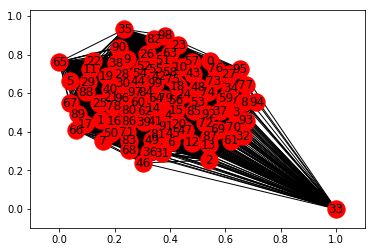

In [38]:
G = nx.from_numpy_matrix(cosine_matr)
#nx.draw(G, with_labels=True, font_weight='bold')

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'))
                       #node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
#nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos)#, edgelist=black_edges, arrows=False)

In [40]:
i, j = np.where((cosine_matr > 0.2)&(cosine_matr < 0.21))
print(list(zip(i,j)))

[(18, 75), (19, 25), (20, 37), (20, 47), (25, 19), (37, 20), (42, 43), (43, 42), (47, 20), (67, 89), (75, 18), (89, 67)]


In [41]:
articles_small.text[18][:500]

'new horizons передать земля научный дать собранный пролёт система плутон харон слово учёный вершина айсберг успеть перевернуть представление ледяной мир решить коротко пересказать заключаться новое открытие миссия new horizons стартовать январь практически знать уникальный ледяной мир плутон считаться девять планета солнечный система хороший снимка иметься момент человечество разрешать небесный тело шарик диаметр пиксель увидеть фотография поверхность планетоид разрешение доля километр пиксель д'

In [42]:
articles_small.text[75][:500]

'распределение частица размер интегральный функция распределение mark s bentley et al nature международный группа учёный опубликовать результат анализ частица пыль комета чурюмов герасименко помощь первое космический атомный силовой микроскоп midas автор выяснить пыль состоять слипнуться субмикронный частица объяснять расхождение один дать розетта результат ранний исследование комета исследование опубликовать nature кратко сообщать редакционный заметка журнал один дать строение материал комета по'

In [43]:
links = cosine_df.stack().reset_index()
links.columns = ['text1', 'text2','similarity']
print(links.shape)
#links.head()

(10000, 3)


In [44]:
links_filtered=links.loc[(links['similarity'] > 0.2) & (links['text1'] < links['text2'])]
links_filtered.shape

(40, 3)

In [49]:
#l = list(links_filtered['text1'].astype(str))
#links_filtered['text1'] = links_filtered['text1'].apply(str).values

In [45]:
G=nx.from_pandas_dataframe(links_filtered, 'text1', 'text2')

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed

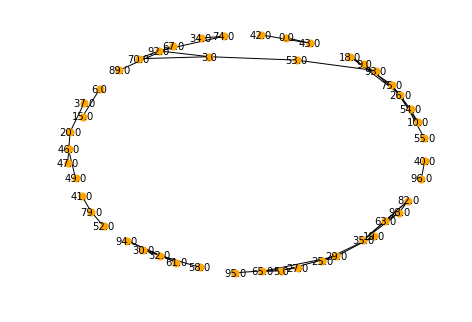

In [47]:
nx.draw(G, with_labels=True, node_color='orange', node_size=50, edge_color='black', linewidths=1, font_size=10)

In [48]:
rubric_map = dict(zip(articles_small.index, articles_small.rubrics))

In [49]:
#df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
links_filtered = links_filtered.assign(rubric_text1 = pd.Series([rubric_map[text1_ind] for text1_ind in links_filtered.text1]).values)
links_filtered = links_filtered.assign(rubric_text2 = pd.Series([rubric_map[text2_ind] for text2_ind in links_filtered.text2]).values)

In [50]:
links_filtered = links_filtered.reset_index(drop = True)
links_filtered

,text1,text2,similarity,rubric_text1,rubric_text2
0,0,43,0.304968,Космос,Космос
1,3,53,0.313320,Технологии,Технологии
2,3,70,0.307167,Технологии,Технологии
3,3,92,0.260561,Технологии,Технологии
4,5,29,0.325243,Физиология человека,Биология
5,5,65,0.352441,Физиология человека,Физиология человека
6,6,15,0.302547,Физиология человека,История
7,9,26,0.248043,Науки о земле,Космос
8,10,54,0.365833,Космос,Космос
9,10,75,0.343187,Космос,Космос


In [51]:
edges = pd.DataFrame({'source' : links_filtered.text1.values,
                      'target' : links_filtered.text2.values,
                      'weight' : links_filtered.similarity.values})

In [52]:
texts = list(links_filtered.text1.values) + list(links_filtered.text2.values)
rubrics = list(links_filtered.rubric_text1.values) + list(links_filtered.rubric_text2)
texts_rubrics = list(zip(texts, rubrics))
texts_rubrics = list(set(texts_rubrics))
#len(texts)

In [53]:
print(texts_rubrics)
print(len(texts_rubrics))

[(27, 'Технологии'), (25, 'Биология'), (54, 'Космос'), (30, 'Физиология человека'), (94, 'Технологии'), (53, 'Технологии'), (20, 'История'), (42, 'Космос'), (61, 'Технологии'), (41, 'Социология'), (40, 'Биология'), (46, 'Технологии'), (34, 'Космос'), (89, 'Физиология человека'), (43, 'Космос'), (95, 'Технологии'), (26, 'Космос'), (37, 'История'), (35, 'Космос'), (9, 'Науки о земле'), (29, 'Биология'), (82, 'Космос'), (3, 'Технологии'), (47, 'История'), (70, 'Технологии'), (79, 'Социология'), (75, 'Космос'), (32, 'Технологии'), (0, 'Космос'), (15, 'История'), (52, 'Социология'), (98, 'Космос'), (63, 'Космос'), (92, 'Технологии'), (74, 'Технологии'), (6, 'Физиология человека'), (55, 'Космос'), (18, 'Космос'), (19, 'Биология'), (58, 'Химия'), (96, 'Физиология человека'), (49, 'Технологии'), (10, 'Космос'), (65, 'Физиология человека'), (93, 'Технологии'), (5, 'Физиология человека'), (67, 'Биология')]
47


In [54]:
texts, rubrics = zip(*texts_rubrics)
#print(texts)
#print(rubrics)

In [55]:
nodes = pd.DataFrame({'node' : texts,
                      'rubric' : rubrics})

In [56]:
G = nx.from_pandas_dataframe(edges, 'source', 'target', 'weight')

In [57]:
nx.set_node_attributes(G, 'rubric', pd.Series(nodes.rubric, index=nodes.node).to_dict())
#nx.set_node_attributes(G, pd.Series(nodes.rubric, index=nodes.node).to_dict(), 'rubric')

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed

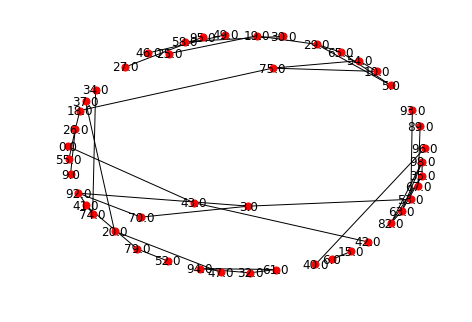

In [87]:
nx.draw(G, with_labels=True, node_size=50)

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed

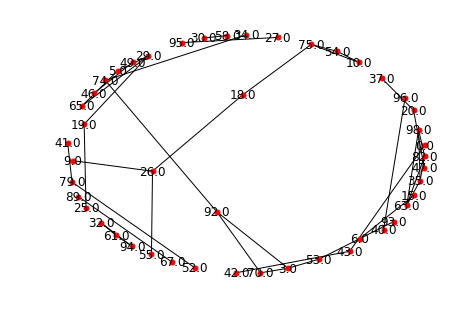

In [59]:
g = nx.Graph()

# open csv edgelist and read edges into graph
for index, row in edges.iterrows():
    g.add_edge(row['source'], row['target'], weight = row['weight'])

# draw network without node color
nx.draw(g, with_labels=True, node_size=25)

In [60]:
set(articles_df.final_rubrics)

{'Computer Science',
 'Биология',
 'История',
 'Космос',
 'Культура',
 'Математика',
 'Мусор',
 'Науки о земле',
 'Политология',
 'Психология',
 'Социология',
 'Технологии',
 'Физика',
 'Физиология человека',
 'Философия',
 'Футурология',
 'Химия',
 'Экономика',
 'Язык'}

In [84]:
rubric_colors = {
    'Computer Science':'blue',
    'Биология':'red',
    'История':'green',
    'Космос':'yellow',
    'Культура':'orange',
    'Математика':'grey',
    'Науки о земле':'pink',
    'Социология':'cyan',
    'Технологии':'magenta',
    'Физиология человека':'darkblue',
    'Химия':'darkgreen'
}

In [83]:
nodes.head(10)

,node,rubric
0,27,Технологии
1,25,Биология
2,54,Космос
3,30,Физиология человека
4,94,Технологии
5,53,Технологии
6,20,История
7,42,Космос
8,61,Технологии
9,41,Социология


In [69]:
#nx.set_node_attributes(G, 'rubric', pd.Series(nodes.rubric, index=nodes.node).to_dict())
rubric_attribute = []
for index, row in nodes.iterrows():
    rubric_attribute.append((row['node'], row['rubric']))
    
rubric_dict = dict(rubric_attribute)

nx.set_node_attributes(g, "rubric", rubric_dict)
    

In [85]:
node_col = []

for node in g.nodes(data=True):
    rubr_attr = node[1]['rubric']
    node_col.append(rubric_colors[rubr_attr])
    #print(node[1]['rubric'])
    

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed

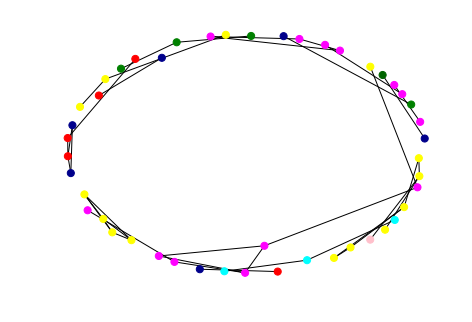

In [86]:
nx.draw(g, with_labels=False, node_size=50, node_color=node_col)

### Embeddings

In [136]:
from DocSim import DocSim

In [137]:
from gensim.models.keyedvectors import KeyedVectors

C:\Program Files\Anaconda3\Lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Slow version of gensim.models.doc2vec is being used


In [139]:
model_path = 'D:/wiki.ru.vec'

In [142]:
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True, encoding='cp1251')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x98 in position 11: character maps to <undefined>

### Clustering

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import *
from sklearn.pipeline import *
from sklearn.preprocessing import Normalizer
from sklearn.metrics import *
from sklearn.cluster import *
import numpy as np

In [148]:
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df = 0.9, min_df = 3, stop_words = stopwords, analyzer = 'word')),
    ('tfidf', TfidfTransformer()),
    #('svd', TruncatedSVD(n_components = 1500)),
    #('norm', Normalizer() ),
    ('clust', KMeans(n_clusters = 9, random_state = 42))
])

In [149]:
pipeline.fit(articles_small.text)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['а', 'в', ...s=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0))])

In [147]:
clust_labels = pipeline.named_steps['clust'].labels_
labels = articles_small.rubrics

print("Homogeneity:", homogeneity_score(labels, clust_labels))
print("Completeness:", completeness_score(labels, clust_labels))
print("V-measure",  v_measure_score(labels, clust_labels))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Homogeneity: 0.476221334623
Completeness: 0.372064668475
V-measure 0.417748571449
Adjusted Rand-Index: 0.0733644941822


In [151]:
clust_labels = pipeline.named_steps['clust'].labels_
labels = articles_small.rubrics

In [152]:
labels.groupby(clust_labels).value_counts()

   rubrics            
0  Биология               4
   Космос                 2
   Культура               1
   Технологии             1
   Физиология человека    1
1  Биология               5
   История                4
   Технологии             3
   Космос                 2
   Науки о земле          2
   Физиология человека    1
2  Технологии             2
   Космос                 1
   Физика                 1
3  Культура               2
   Космос                 1
   Физиология человека    1
4  Технологии             7
   Космос                 1
5  Биология               6
   История                4
   Космос                 4
   Технологии             3
   Физика                 3
   Физиология человека    3
   Науки о земле          2
   Социология             2
   Футурология            2
   Политология            1
   Философия              1
   Химия                  1
   Экономика              1
   Язык                   1
6  Космос                 6
   История               